In [26]:
import os
import pandas as pd
import numpy as np # <-- Tambien maneja los NaN
from scipy.optimize import curve_fit
import warnings
import matplotlib.pyplot as plt
from scipy import stats
print(f"Los .csv son: {os.listdir('datos_peaks')}")

# Lista de longitudes de péndulos
Longit = [["L1",8],["L2",13],["L3",5]]
for i in range(len(Longit)):
  print(f'{Longit[i][0]} = {Longit[i][1]} cm')

array_de_radios = [
178.9, 178.94, 178.55, 178.92, 178.61, 178.78, 178.63, 178.72, 178.46, 178.43, 178.43, 178.65, 178.61, 178.76, 178.83, 178.61, 178.74, 178.65, 178.76, 178.69, 178.32, 178.83, 178.63, 178.61, 178.58, 178.53, 178.63, 178.47, 178.64, 178.46, 178.84, 178.4, 178.56, 178.54, 178.57, 178.69, 178.59, 178.47, 178.49, 178.55, 178.68, 178.39, 178.2, 178.76, 178.79, 178.62, 178.38, 178.48, 178.39, 178.81, 178.7, 178.66, 178.73, 178.38, 178.59, 178.41, 178.76, 178.63, 178.67, 178.69, 178.73, 178.74, 178.69, 178.56, 178.37, 178.82, 178.64, 178.5, 178.66, 178.63, 178.36, 178.48, 178.57, 178.84, 178.88, 178.45, 178.5, 178.63, 178.53, 178.8, 178.81, 178.38, 178.69, 178.69, 178.85, 178.51, 178.76, 178.84, 178.48, 178.47, 178.35, 178.51, 178.73, 178.4, 178.69, 178.9, 178.76, 178.81, 178.57, 178.68, 178.75,
178.43, 178.46, 178.57, 178.85, 178.64, 178.45, 178.62, 178.34, 178.68, 178.61, 178.3, 178.48, 178.83, 178.64, 178.76, 178.8, 178.87, 178.54, 178.49, 178.46, 178.8, 178.67, 178.57, 178.57, 178.39, 178.47, 178.46, 178.46, 178.7, 178.27, 178.67, 178.56, 178.72, 178.46, 178.64, 178.28, 178.51, 178.81, 178.69, 178.57, 178.58, 178.86, 178.64, 178.59, 178.48, 178.66, 178.64, 178.35, 178.56, 178.45, 178.49, 178.62, 178.77, 178.76, 178.63, 178.65, 178.72, 178.79, 178.7, 178.62, 178.58, 178.75, 178.51, 178.66, 178.65, 178.35, 178.77, 178.87, 178.76, 178.65, 178.88, 178.88, 178.36, 178.73, 178.57, 178.62, 178.62, 178.67, 178.58, 178.67, 178.56, 178.18, 178.66, 178.74, 178.46, 178.72, 178.32, 178.71, 178.45, 178.38, 178.44, 178.88, 178.78, 178.48, 178.63, 178.65, 178.63,
178.22, 178.61, 178.9, 178.63, 178.81, 178.36, 178.75, 178.52, 178.63, 178.68, 178.79, 178.69, 178.71, 178.62, 178.81, 178.57, 178.49, 178.54, 178.89, 178.41, 178.74, 178.67, 178.63, 178.5, 178.47, 178.42, 178.43, 178.55, 178.47, 178.7, 178.49, 178.83, 178.73, 178.62, 178.35, 178.58, 178.79, 178.56, 178.35, 178.45, 178.56, 178.23, 178.42, 178.46, 178.61, 178.78, 178.33, 178.59, 178.47, 178.64, 178.38, 178.56, 178.7, 178.62, 178.74, 178.91, 178.63, 178.78, 178.2, 178.36, 178.43, 178.73, 178.59, 178.48, 178.52, 178.66, 178.72, 178.54, 178.74, 178.61, 178.75, 178.66, 178.69, 178.68, 178.87, 178.52, 178.85, 178.56, 178.69, 178.66, 178.55, 178.45, 178.82, 178.68, 178.69, 178.69, 178.74, 178.39, 178.74, 178.69, 178.54, 178.75, 178.45, 178.74, 178.59, 178.8, 178.5,
178.43, 178.69, 178.65, 178.54, 178.48, 178.37, 178.46, 178.48, 178.73, 178.62, 178.32, 178.71, 178.47, 178.53, 178.53, 178.53, 178.81, 178.59, 178.5, 178.39, 178.83, 178.71, 178.75, 178.71, 178.41, 178.34, 178.52, 178.51, 178.57, 178.88, 178.48, 178.36, 178.4, 178.59, 178.34, 178.71, 178.82, 178.41, 178.79, 178.68, 178.44, 178.83, 178.54, 178.78, 178.28, 178.47, 178.79, 178.46, 178.73, 178.84, 178.51, 178.51, 178.27, 178.62, 178.35, 178.96, 178.68, 178.76, 178.66, 178.43, 178.47, 178.55, 178.62, 178.58, 178.51, 179.01, 178.35, 178.52, 178.72, 178.7, 178.87, 178.84, 178.52, 178.77, 178.76, 178.7, 178.5, 178.68, 178.48, 178.67, 178.42, 178.62, 178.52, 178.7, 178.5, 178.68, 178.56, 178.81, 178.78, 178.82, 178.75, 178.64, 178.78, 178.72, 178.57, 178.8,
178.68, 178.61, 178.55, 178.45, 178.58, 178.77, 178.71, 178.41, 178.5, 178.6, 178.6, 178.8, 178.52, 178.56, 178.64, 178.77, 178.53, 178.59, 178.61, 178.56, 178.54, 178.58, 178.7, 178.69, 178.85, 178.56, 178.33, 178.28, 178.39, 178.72, 178.5, 178.3, 178.82, 178.81, 178.63, 178.49, 178.77, 178.75, 178.76, 178.67, 178.67, 178.45, 178.84, 178.66, 178.76, 178.84, 178.54, 178.87, 178.72, 178.78, 178.62, 178.64, 178.9, 178.71, 178.25, 178.49, 178.55, 178.4, 178.54, 178.38, 178.78, 178.46, 178.44, 178.61, 178.7, 178.82, 178.4, 178.84, 178.75, 178.58, 178.53, 178.83, 178.54, 178.23, 178.66, 178.6, 178.41, 178.88, 178.87, 178.72, 178.48, 178.5, 178.5, 178.58, 178.6, 178.36, 178.49, 178.65, 178.42, 178.87, 178.56, 178.57, 178.53, 178.57, 178.47, 178.72, 178.61,
178.44, 178.81, 178.75, 178.66, 178.71, 178.44, 178.49, 178.46, 178.61, 178.32, 178.58, 178.53, 178.78, 178.38, 178.54, 178.21, 178.36, 178.73, 178.77, 178.63, 178.44, 178.48, 178.51, 178.39, 178.72, 178.78, 178.36, 178.51, 178.59, 178.64, 178.51, 178.59, 178.67, 178.64, 178.38, 178.7, 178.36, 178.64, 178.57, 178.47, 178.43, 178.05, 178.3, 178.62, 178.52, 178.56, 178.51, 178.69, 178.67, 178.44, 178.8, 178.74, 178.64, 178.55, 178.4, 178.42, 178.75, 178.62, 178.79, 178.85, 178.35, 178.83, 178.77, 178.82, 178.96, 178.67, 178.59, 178.8, 178.36, 178.57, 178.6, 178.8, 178.46, 178.71, 178.68, 178.31, 178.53, 178.49, 178.06, 178.52, 178.72, 178.64, 178.81, 178.64, 178.24, 178.39, 178.61, 178.17, 178.69, 178.67, 178.77, 178.37, 178.51, 178.49, 178.62, 178.88,
178.73, 178.75, 178.44, 178.46, 178.59, 178.37, 178.5, 178.27, 178.43, 178.48, 178.81, 178.87, 178.25, 178.64, 178.53, 178.86, 178.17, 178.34, 178.52, 178.76, 178.99, 178.84, 178.46, 178.7, 178.73, 178.85, 178.69, 178.28, 178.75, 178.68, 178.27, 178.39, 178.67, 178.58, 178.75, 178.75, 178.7, 178.56, 178.66, 178.42, 178.71, 178.62, 178.87, 178.64, 178.66, 178.52, 178.72, 178.75, 178.75, 178.57, 178.42, 178.28, 178.88, 178.44, 178.44, 178.51, 178.58, 178.85, 178.43, 178.66, 178.32, 178.55, 178.41, 178.63, 178.69, 178.57, 178.46, 178.5, 178.35, 178.51, 178.58, 178.45, 178.49, 178.51, 178.66, 178.19, 178.42, 178.71, 178.36, 178.58, 178.52, 178.48, 178.54, 178.54, 178.49, 178.74, 178.48, 178.56, 178.48, 178.68, 178.43, 178.53, 178.47, 178.15,
178.44, 178.46, 178.57, 178.43, 178.26, 178.68, 178.44, 178.44, 178.48, 178.4, 178.45, 178.56, 178.52, 178.56, 178.54, 178.65, 178.48, 178.53, 178.56, 178.49, 178.35, 178.57, 178.56, 178.53, 178.61, 178.38, 178.59, 178.44, 178.73, 178.55, 178.34, 178.62, 178.56, 178.59, 178.64, 178.55, 178.66, 178.53, 178.64, 178.34, 178.54, 178.77, 178.15, 178.4, 178.53, 178.57, 178.56, 178.69, 178.57, 178.54, 178.65, 178.8, 178.63, 178.44, 178.82, 178.79, 178.5, 178.41, 178.5, 178.84, 178.37, 178.43, 178.67, 178.49, 178.71, 178.44, 178.6, 178.56, 178.56, 178.48, 178.62, 178.33, 178.59, 178.43, 178.44, 178.29, 178.67, 178.39, 178.68, 178.57, 178.48, 178.6, 178.54, 178.59, 178.73, 178.25, 178.17, 178.64, 178.83, 178.57, 178.59, 178.23, 178.78, 178.55,
178.59, 178.55, 178.77, 178.52, 178.7, 178.52, 178.73, 178.5, 178.76, 178.31, 178.6, 178.41, 178.46, 178.51, 178.63, 178.64, 178.73, 178.51, 178.39, 178.47, 178.57, 178.32, 178.53, 178.55, 178.5, 178.55, 178.73, 178.68, 178.54, 178.49, 178.4, 178.62, 178.45, 178.46, 178.27, 178.78, 178.44, 178.64, 178.26, 178.35, 178.77, 178.57, 178.51, 178.53, 178.47, 178.47, 178.37, 178.34, 178.52, 178.73, 178.74, 178.68, 178.71, 178.56, 178.77, 178.62, 178.48, 178.61, 178.65, 178.66, 178.67, 178.45, 178.57, 178.53, 178.62, 178.29, 178.62, 178.43, 178.77, 178.68, 178.42, 178.72, 178.74, 178.57, 178.44, 178.45, 178.42, 178.52, 178.59, 178.29, 178.45, 178.53, 178.6, 178.27, 178.44, 178.63, 178.33, 178.63, 178.51, 178.68, 178.51, 178.45, 178.7,
178.47, 178.64, 178.56, 178.73, 178.82, 178.44, 178.32, 178.56, 178.7, 178.49, 178.68, 178.51, 178.54, 178.53, 178.57, 178.37, 178.53, 178.47, 178.41, 178.62, 178.55, 178.56, 178.82, 178.34, 178.43, 178.65, 178.46, 178.39, 178.37, 178.68, 178.51, 178.73, 178.36, 178.39, 178.5, 178.51, 178.6, 178.49, 178.27, 178.57, 178.59, 178.62, 178.49, 178.49, 178.6, 178.67, 178.71, 178.55, 178.5, 178.72, 178.38, 178.6, 178.69, 178.47, 178.77, 178.62, 178.35, 178.71, 178.53, 178.72, 178.46, 178.63, 178.33, 178.64, 178.55, 178.97, 178.66, 178.41, 178.53, 178.4, 178.61, 178.45, 178.18, 178.4, 178.52, 178.64, 178.47, 178.42, 178.71, 178.63, 178.54, 178.45, 178.64, 178.34, 178.61, 178.67, 178.51, 178.39, 178.65, 178.76, 178.57, 178.41, 178.52,
178.51, 178.56, 178.67, 178.78, 178.36, 178.48, 178.19, 178.75, 178.49, 178.63, 178.51, 178.62, 178.5, 178.52, 178.58, 178.48, 178.47, 178.71, 178.55, 178.51, 178.91, 178.63, 178.35, 178.47, 178.6, 178.77, 178.61, 178.35, 178.41, 178.49, 178.64, 178.79, 178.67, 178.43, 178.45, 178.56, 178.4, 178.45, 178.73, 178.81, 178.58, 178.25, 178.69, 178.58, 178.29, 178.29, 178.48, 178.52, 178.58, 178.49, 178.61, 178.37, 178.3, 178.33, 178.41, 178.6, 178.48, 178.36, 178.74, 178.62, 178.69, 178.78, 178.5, 178.46, 178.79, 178.34, 178.79, 178.25, 178.44, 178.8, 178.53, 178.56, 178.36, 178.91, 178.42, 178.37, 178.44, 178.57, 178.37, 178.55, 178.36, 178.79, 178.8, 178.55, 178.7, 178.47, 178.65, 178.74, 178.65, 178.58, 178.56, 178.47, 178.67,
178.48, 178.74, 178.25, 178.48, 178.37, 178.39, 178.56, 178.59, 178.75, 178.63, 178.28, 178.54, 178.66, 178.3, 178.48, 178.66, 178.56, 178.59, 178.59, 178.52, 178.9, 178.82, 178.34, 178.59, 178.68, 178.49, 178.52, 178.41, 178.63, 178.7, 178.67, 178.91, 178.64, 178.58, 178.72, 178.43, 178.32, 178.4, 178.51, 178.68, 178.36, 178.47, 178.51, 178.67, 178.39, 178.46, 178.71, 178.49, 178.5, 178.57, 178.66, 178.68, 178.79, 178.59, 178.68, 178.31, 178.59, 178.4, 178.35, 178.72, 178.27, 178.54, 178.52, 178.69, 178.52, 178.56, 178.57, 178.65, 178.76, 178.51, 178.49, 178.51, 178.84, 178.43, 178.65, 178.84, 178.58, 178.57, 178.86, 178.4, 178.57, 178.73, 178.62, 178.66, 178.47, 178.85, 178.7, 178.4, 178.76, 178.51,
178.38, 178.48, 178.56, 178.65, 178.67, 178.7, 178.69, 178.8, 178.37, 178.62, 178.62, 178.39, 178.52, 178.79, 178.08, 178.73, 178.4, 178.52, 178.71, 178.56, 178.5, 178.68, 178.39, 178.87, 178.62, 178.64, 178.51, 178.6, 178.82, 178.58, 178.76, 178.53, 178.53, 178.5, 178.59, 178.65, 178.4, 178.36, 178.54, 178.9, 178.77, 178.73, 178.62, 178.62, 178.4, 178.5, 178.39, 178.36, 178.46, 178.54, 178.51, 178.58, 178.36, 178.57, 178.5, 178.47, 178.48, 178.43, 178.22, 178.59, 178.12, 178.46, 178.75, 178.57, 178.17, 178.61, 178.68, 178.51, 178.46, 178.65, 178.71, 178.59, 178.33, 178.41, 178.53, 178.62, 178.69, 178.56, 178.72, 178.66, 178.51, 178.54, 178.74, 178.59, 178.41, 178.69, 178.52, 178.56, 178.4, 178.59, 178.61, 178.49, 178.53,
178.55, 178.74, 178.34, 178.54, 178.45, 178.48, 178.69, 178.41, 178.46, 178.29, 178.75, 178.38, 178.35, 178.49, 178.21, 178.54, 178.43, 178.79, 178.51, 178.75, 178.8, 178.47, 178.29, 178.35, 178.28, 178.68, 178.68, 178.78, 178.46, 178.75, 178.57, 178.73, 178.38, 178.56, 178.5, 178.66, 178.69, 178.64, 178.44, 178.67, 178.7, 178.66, 178.68, 178.69, 178.69, 178.76, 178.45, 178.42, 178.48, 178.43, 178.4, 178.38, 178.39, 178.45, 178.79, 178.4, 178.46, 178.37, 178.43, 178.42, 178.34, 178.67, 178.65, 178.61, 178.54, 178.83, 178.52, 178.49, 178.69, 178.66, 178.56, 178.34, 178.44, 178.66, 178.47, 178.42, 178.6, 178.78, 178.46, 178.61, 178.54, 178.75, 178.65, 178.38, 178.68, 178.43, 178.42, 178.77, 178.62, 178.32, 178.74, 178.32, 178.68,
178.48, 178.6, 178.47, 178.58, 178.6, 178.43, 178.64, 178.59, 178.24, 178.51, 178.76, 178.64, 178.86, 178.34, 178.57, 178.3, 178.68, 178.77, 178.76, 178.59, 178.72, 178.7, 178.35, 178.41, 178.65, 178.46, 178.5, 178.66, 178.28, 178.61, 178.47, 178.38, 178.49, 178.72, 178.43, 178.3, 178.56, 178.41, 178.72, 178.66, 178.56, 178.46, 178.33, 178.8, 178.36, 178.56, 178.61, 178.71, 178.49, 178.48, 178.28, 178.55, 178.74, 178.3, 178.71, 178.69, 178.55, 178.62, 178.86, 178.32, 178.64, 178.55, 178.41, 178.56, 178.4, 178.67, 178.66, 178.56, 178.36, 178.72, 178.72, 178.52, 178.3, 178.58, 178.28, 178.4, 178.54, 178.57, 178.69, 178.67, 178.34, 178.4, 178.8, 178.38, 178.59, 178.27, 178.44, 178.5, 178.86, 178.56,
178.71, 178.65, 178.45, 178.76, 178.64, 178.82, 178.54, 178.47, 178.73, 178.79, 178.48, 178.58, 178.39, 178.47, 178.54, 178.41, 178.59, 178.37, 178.78, 178.77, 178.5, 178.61, 178.75, 178.44, 178.39, 178.75, 178.72, 178.73, 178.72, 178.64, 178.78, 178.75, 178.74, 178.54, 178.59, 178.52, 178.6, 178.51, 178.41, 178.65, 178.4, 178.57, 178.51, 178.42, 178.7, 178.71, 178.67, 178.59, 178.39, 178.52, 178.34, 178.67, 178.71, 178.27, 178.49, 178.72, 178.49, 178.86, 178.9, 178.78, 178.76, 178.51, 178.44, 178.37, 178.49, 178.44, 178.49, 178.67, 178.68, 178.47, 178.72, 178.41, 178.46, 178.4, 178.44, 178.68, 178.52, 178.54, 178.41, 178.24, 178.55, 178.86, 178.46, 178.7, 178.65, 178.34, 178.57, 178.74, 178.37,
178.71, 178.59, 178.48, 178.44, 178.22, 178.51, 178.49, 178.61, 178.42, 178.57, 178.58, 178.62, 178.69, 178.69, 178.4, 178.49, 178.47, 178.48, 178.36, 178.46, 178.48, 178.58, 178.41, 178.7, 178.34, 178.73, 178.78, 178.46, 178.17, 178.52, 178.51, 178.7, 178.72, 178.52, 178.59, 178.29, 178.4, 178.57, 178.68, 178.43, 178.64, 178.49, 178.58, 178.49, 178.63, 178.63, 178.81, 178.45, 178.65, 178.5, 178.54, 178.38, 178.41, 178.64, 178.48, 178.54, 178.41, 178.51, 178.52, 178.57, 178.38, 178.49, 178.74, 178.71, 178.59, 178.53, 178.49, 178.71, 178.29, 178.64, 178.74, 178.46, 178.48, 178.58, 178.29, 178.49, 178.75, 178.48, 178.77, 178.49, 178.35, 178.49, 178.52, 178.69, 178.58, 178.56, 178.66, 178.37, 178.19, 178.73,
178.48, 178.52, 178.52, 178.64, 178.84, 178.67, 178.52, 178.5, 178.54, 178.77, 178.56, 178.68, 178.78, 178.52, 178.45, 178.65, 178.69, 178.41, 178.61, 178.31, 178.59, 178.61, 178.45, 178.57, 178.45, 178.53, 178.54, 178.68, 178.64, 178.68, 178.25, 178.75, 178.69, 178.63, 178.39, 178.66, 178.49, 178.64, 178.77, 178.44, 178.33, 178.71, 178.48, 178.72, 178.74, 178.35
]
promedio_radio=np.mean(array_de_radios)
print(f'El promedio de los radios es: {promedio_radio:.2f} pixeles')
q=3/promedio_radio #constante de proporcionalidad entre pixeles y mm, el radio de la bolita era de 3 mm
std_radio=np.std(array_de_radios) 
print(f'La desviacion estandar de los radios es: {std_radio:.2f} pixeles')
#Calculo

Los .csv son: ['peaks_data_l1.csv', 'peaks_data_l2.csv', 'peaks_data_l3.csv']
L1 = 8 cm
L2 = 13 cm
L3 = 5 cm
El promedio de los radios es: 178.57 pixeles
La desviacion estandar de los radios es: 0.16 pixeles


In [47]:


# --- Definición de la función para el ajuste exponencial ---
# Esta es la función y = A * e^(-alpha * t) que se ajustará a los datos.
def funcion_exponencial(t, offy, offx, A, alpha):
    """
    Define la función de decaimiento exponencial que se va a ajustar.

    Args:
        t (array-like): Variable independiente (en este caso, 'Peak X').
        A (float): Amplitud o valor inicial.
        alpha (float): Coeficiente de decaimiento.

    Returns:
        array-like: El valor de la función para los parámetros dados.
    """
    return A * np.exp(-alpha*(t-offx))+offy

# --- Definición de la función principal ---
def obtenerValores(ruta_csv, s):
    """
    Lee un archivo CSV con datos de picos, agrupa por identificador,
    realiza un ajuste de curva exponencial para cada grupo y devuelve
    el primer valor de 'Peak Y' y el parámetro 'alpha' ajustado.

    Args:
        ruta_csv (str): La ruta al archivo CSV.

    Returns:
        numpy.ndarray: Una matriz de 2 columnas donde cada fila contiene
                       el primer 'Peak Y' y el 'alpha' de cada grupo.
    """
    # Ignorar advertencias de optimización de curve_fit para una salida más limpia
    warnings.filterwarnings("ignore", category=RuntimeWarning)

    # Cargar los datos desde el archivo CSV
    datos = pd.read_csv(ruta_csv)

    # Obtener una lista de todos los identificadores únicos de los experimentos
    identificadores_unicos = datos['Dataset Identifier'].dropna().unique()

    print(f'La lista de identificadores es: {identificadores_unicos}')
    print('='*200)

    # Lista para almacenar los resultados de cada grupo
    matriz_resultados = []
    t_values=[]
    y_values=[]
    
    carpeta = 'C:\Facu\Fisica Experimental II\Pasantia\Graficas'
    os.makedirs(carpeta, exist_ok=True)
    # Iterar sobre cada identificador de experimento
    for identificador in identificadores_unicos:

        # Filtrar el DataFrame para obtener solo los datos del grupo actual
        grupo_actual = datos[datos['Dataset Identifier'] == identificador]

        # Extraer los datos de 't' (Peak X) y 'y' (Peak Y)
        t = grupo_actual['Peak X'].values
        y = grupo_actual['Peak Y'].values
        t_ajuste=np.linspace(min(t),max(t),100)
        #print(f'El valor de X es: {t}')
        #print(f'El valor de Y es: {y}')

        try:
            # Realizar el ajuste de la curva.
            # 'p0' es una estimación inicial para los parámetros [A, alpha].
            # Usamos el primer valor de 'y' como estimación inicial para A.
            parametros_optimizados, pcov = curve_fit(lambda x,a,b :funcion_exponencial(x,y[-1],t[0],a,b), t, y, p0=[y[0], 0.1])
            #print(parametros_optimizados)
            # Extraer el valor de alpha y A optimizados
            alpha_calculado = parametros_optimizados[1]
            amplitud_calculada = parametros_optimizados[0]
            t_stud=stats.t.ppf(0.975, df=len(grupo_actual)-1)
            alpha_error=t_stud*np.sqrt(np.diag(pcov))[1]/np.sqrt(len(grupo_actual))
            amplitud_error=t_stud*np.sqrt(np.diag(pcov))[0]/np.sqrt(len(grupo_actual))
            #alpha_error=np.sqrt(np.diag(pcov))[1]
            print(f'Para el grupo {identificador}, el valor de alpha es: {alpha_calculado:.4f} ± {alpha_error:.4f}')
            print(f'Para el grupo {identificador}, el valor de A_0 es: {amplitud_calculada*q:.3f} ± {amplitud_error*q:.3f}')
            # Obtener el primer valor de "Peak Y" para este grupo
            primer_valor_y = y[0]

            # Añadir los resultados a nuestra lista
            matriz_resultados.append([amplitud_calculada, amplitud_error, alpha_calculado,alpha_error])

        except RuntimeError:
            # Si el ajuste de la curva no converge, se imprime un mensaje y se continúa.
            print(f"No se pudo realizar el ajuste para el grupo: {identificador}")
            matriz_resultados.append([y[0], np.nan]) # Añadir NaN si falla

        ruta_salida = os.path.join(carpeta, f"grafico_{identificador}_{s}.png")
        plt.ioff()
        plt.plot(t, y*q, '.', label=f'Posicion en funcion del tiempo del grupo {identificador}.')
        plt.plot(t_ajuste, funcion_exponencial(t_ajuste,y[-1],t[0],amplitud_calculada,alpha_calculado)*q, '-', label=fr'Ajuste del grupo {identificador}. $\alpha$={alpha_calculado:.4f} $1/s$, $A_0$={q*amplitud_calculada:.2f} mm')
        plt.legend()
        plt.savefig(ruta_salida)
        plt.close()
        
    # Convertir la lista de resultados en una matriz de NumPy
    return np.array(matriz_resultados)



Los archivos que se toman son: ['peaks_data_l1_fps.csv', 'peaks_data_l2_fps.csv', 'peaks_data_l3_fps.csv']


Obtenemos los valores de alfa para L1 = 8 cm
La lista de identificadores es: ['A' 'C2' 'C5' 'C8' 'C11' 'C14' 'C17' 'C20' 'C23' 'C26' 'C29' 'C32']
Para el grupo A, el valor de alpha es: 0.7327 ± 0.0153
Para el grupo A, el valor de A_0 es: 0.542 ± 0.007
Para el grupo C2, el valor de alpha es: 0.7950 ± 0.0112
Para el grupo C2, el valor de A_0 es: 0.662 ± 0.006
Para el grupo C5, el valor de alpha es: 0.8594 ± 0.0237
Para el grupo C5, el valor de A_0 es: 0.766 ± 0.013
Para el grupo C8, el valor de alpha es: 0.8079 ± 0.0152
Para el grupo C8, el valor de A_0 es: 1.263 ± 0.015
Para el grupo C11, el valor de alpha es: 0.8223 ± 0.0344
Para el grupo C11, el valor de A_0 es: 0.966 ± 0.025
Para el grupo C14, el valor de alpha es: 0.8896 ± 0.0256
Para el grupo C14, el valor de A_0 es: 0.971 ± 0.017
Para el grupo C17, el valor de alpha es: 0.7866 ± 0.0124
Para el grupo C17, el valor de A_0 es:

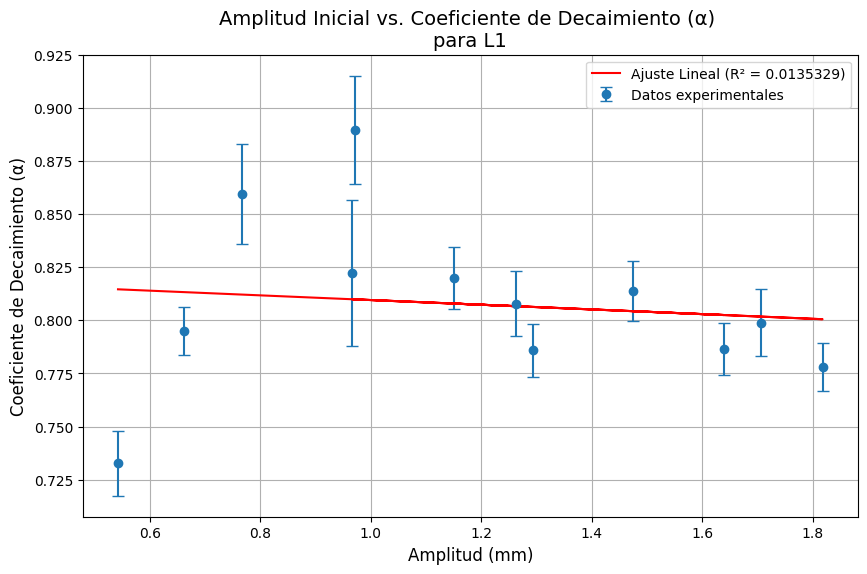



Obtenemos los valores de alfa para L2 = 13 cm
La lista de identificadores es: ['A' 'D' 'G' 'J' 'M' 'P' 'S' 'V' 'Y' 'AB' 'AE' 'AH' 'AK']
Para el grupo A, el valor de alpha es: 3.1322 ± 0.5894
Para el grupo A, el valor de A_0 es: 0.243 ± 0.021
Para el grupo D, el valor de alpha es: 3.2704 ± 0.5105
Para el grupo D, el valor de A_0 es: 0.201 ± 0.014
Para el grupo G, el valor de alpha es: 3.2701 ± 0.3788
Para el grupo G, el valor de A_0 es: 0.163 ± 0.008
Para el grupo J, el valor de alpha es: 3.5813 ± 0.3896
Para el grupo J, el valor de A_0 es: 0.327 ± 0.015
Para el grupo M, el valor de alpha es: 3.7489 ± 0.3491
Para el grupo M, el valor de A_0 es: 0.353 ± 0.014
Para el grupo P, el valor de alpha es: 3.5361 ± 0.4109
Para el grupo P, el valor de A_0 es: 0.395 ± 0.019
Para el grupo S, el valor de alpha es: 3.5959 ± 0.3509
Para el grupo S, el valor de A_0 es: 0.307 ± 0.013
Para el grupo V, el valor de alpha es: 3.4954 ± 0.3103
Para el grupo V, el valor de A_0 es: 0.416 ± 0.016
Para el grupo 

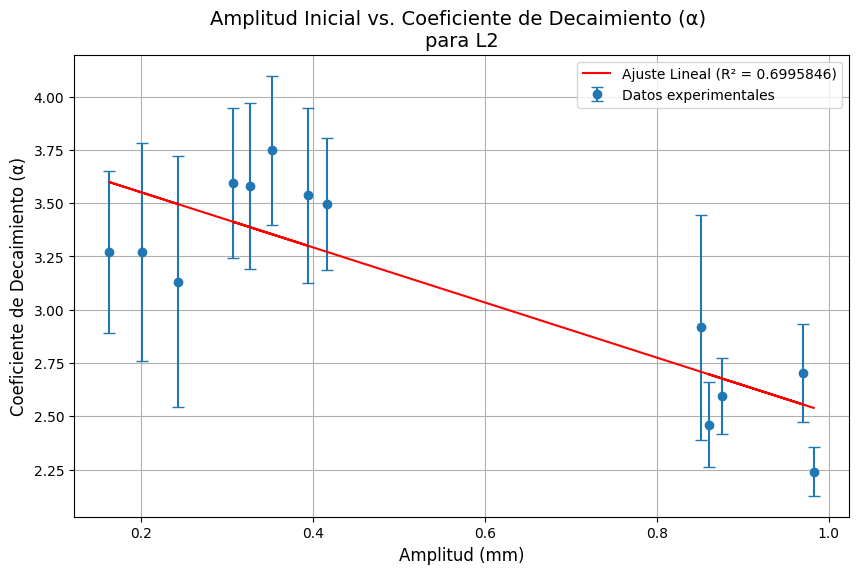



Obtenemos los valores de alfa para L3 = 5 cm
La lista de identificadores es: ['A' 'D' 'G' 'J' 'M' 'P' 'S' 'V' 'Y' 'AB' 'AE']
Para el grupo A, el valor de alpha es: 0.9420 ± 0.0118
Para el grupo A, el valor de A_0 es: 0.769 ± 0.006
Para el grupo D, el valor de alpha es: 1.0868 ± 0.0276
Para el grupo D, el valor de A_0 es: 0.197 ± 0.003
Para el grupo G, el valor de alpha es: 0.9722 ± 0.0153
Para el grupo G, el valor de A_0 es: 0.516 ± 0.005
Para el grupo J, el valor de alpha es: 0.9638 ± 0.0156
Para el grupo J, el valor de A_0 es: 0.420 ± 0.004
Para el grupo M, el valor de alpha es: 0.9407 ± 0.0157
Para el grupo M, el valor de A_0 es: 1.122 ± 0.012
Para el grupo P, el valor de alpha es: 0.8908 ± 0.0114
Para el grupo P, el valor de A_0 es: 0.734 ± 0.006
Para el grupo S, el valor de alpha es: 0.8977 ± 0.0104
Para el grupo S, el valor de A_0 es: 0.992 ± 0.007
Para el grupo V, el valor de alpha es: 0.9121 ± 0.0118
Para el grupo V, el valor de A_0 es: 0.833 ± 0.007
Para el grupo Y, el valor

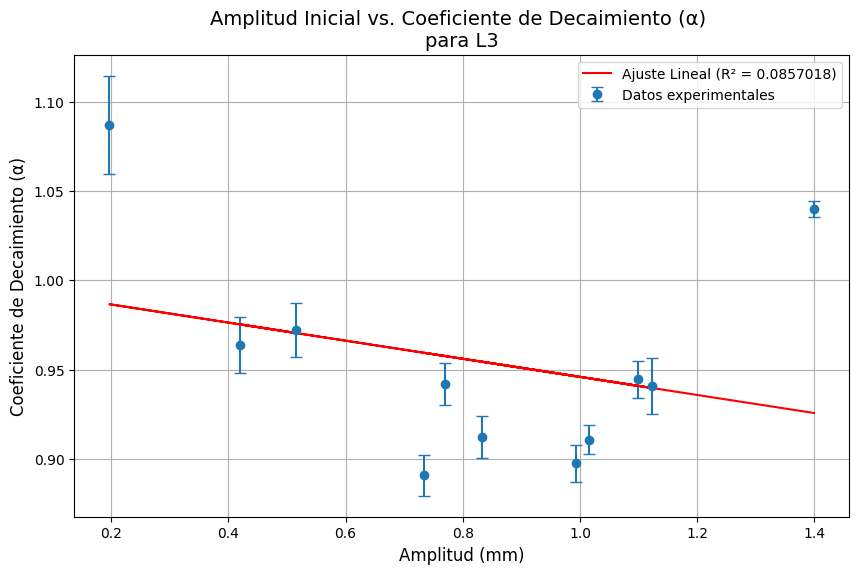



EL PROMEDIO GENERAL DE TODOS LOS VALORES DE ALFA ES: 0.92318


In [48]:
# ========================================================================================================
# --- Ejecución del código ---

import os
import matplotlib.pyplot as plt
from scipy.stats import linregress # <-- Importamos la función para el ajuste lineal
import numpy as np # <-- Importamos numpy para manejar los NaN

# Array de datos alfa
alfa_array = []


# Rutas de los archivos (asegúrate de que sea correcta en tu entorno de Colab)
ruta_list=os.listdir('datos_fps')
print(f'Los archivos que se toman son: {ruta_list}\n')
#print('')

# Suponiendo que la variable 'Longit' está definida previamente en tu código
# Ejemplo: Longit = [('Archivo1', 10), ('Archivo2', 20)]
s=1
for index in range(len(ruta_list)):
  print('')
  print(f'Obtenemos los valores de alfa para {Longit[index][0]} = {Longit[index][1]} cm')
  ruta_del_archivo = f'datos_fps/{ruta_list[index]}'

  # Llamar a la función para obtener los valores y guardarlos
  datos_hechos = obtenerValores(ruta_del_archivo, s)

  s+=1
  # Imprimir la matriz final de resultados
  print(f'La matriz de valores de A y alfa para {Longit[index][0]} es:')
  print(datos_hechos)

  # --- Cálculo y visualización del promedio de alfa ---

  # Extraemos la segunda columna (índice 1), que contiene todos los valores de alfa.
  columna_alfas = datos_hechos[:, 1]

  #Agrego los alfa de cada iteración a un mismo array
  alfa_array.append(columna_alfas)

  # Calculamos el promedio de los valores de alfa.
  # Usamos np.nanmean() para ignorar de forma segura cualquier valor 'nan'
  # que pudiera haber si algún ajuste de curva falló.
  promedio_de_alfa = np.nanmean(columna_alfas)


  # Imprimimos el resultado de forma clara.
  print(f"El promedio de los valores de alfa para {Longit[index][0]} = {Longit[index][1]} cm es: {promedio_de_alfa:.5f}")

  # --- Sección de gráfico ---

  # Extraemos los datos para el gráfico
  amplitud_x = datos_hechos[:, 0]  # Columna 1 para el eje X
  amplitud_er=datos_hechos[:,1]
  alfa_y = datos_hechos[:, 2]      # Columna 2 para el eje Y
  alpha_er = datos_hechos[:,3] #Errores de alfa
  # --- INICIO DE LA MODIFICACIÓN PARA AJUSTE LINEAL ---

  # Filtramos los valores NaN que pueden haber resultado de ajustes fallidos
  # para que el ajuste lineal no falle.
  mask = ~np.isnan(alfa_y)
  amplitud_x_clean = amplitud_x[mask]
  alfa_y_clean = alfa_y[mask]
  alpha_er_clean = alpha_er[mask]
  # Realizamos el ajuste lineal solo si hay suficientes datos
  if len(amplitud_x_clean) > 1:
      # slope: pendiente, intercept: ordenada al origen, r_value: coeficiente R
      slope, intercept, r_value, p_value, std_err = linregress(amplitud_x_clean, alfa_y_clean)

      # Calculamos R^2
      r_squared = r_value**2

      # Creamos los datos para la recta de ajuste
      y_fit = slope * amplitud_x_clean + intercept

      # Creamos la etiqueta para la leyenda con el valor R^2
      fit_label = f'Ajuste Lineal (R² = {r_squared:.7f})'

  # --- FIN DE LA MODIFICACIÓN PARA AJUSTE LINEAL ---

  # Creamos la figura y los ejes para el gráfico
  plt.figure(figsize=(10, 6))

  # Creamos el gráfico de dispersión de los datos originales
  plt.errorbar(amplitud_x*q, alfa_y, alpha_er, capsize=4, fmt='o', label='Datos experimentales')

  # Graficamos la recta del ajuste lineal si se pudo calcular
  if len(amplitud_x_clean) > 1:
      plt.plot(amplitud_x_clean*q, y_fit, color='red', linestyle='-', label=fit_label)

  # Añadimos títulos y etiquetas para que el gráfico sea claro
  plt.title(f'Amplitud Inicial vs. Coeficiente de Decaimiento (α) \npara {Longit[index][0]}', fontsize=14)
  plt.xlabel('Amplitud (mm)', fontsize=12)
  plt.ylabel('Coeficiente de Decaimiento (α)', fontsize=12)

  plt.grid(True)

  # Añadimos la leyenda al gráfico
  plt.legend()

  # Mostramos el gráfico
  plt.show()
  #Esto es para que se vea más fachera la consola
  print('='*200)
  print('')


# --- Cálculo del promedio total de todos los alfas ---

# Primero, aplanamos la lista de arrays 'alfa_array' en un único array 1D.
todos_los_alfas = np.concatenate(alfa_array)

# Ahora, calculamos el promedio de todos los valores de alfa combinados
promedio_total_alfa = np.nanmean(todos_los_alfas)

# Imprimimos el promedio general final.
print('')
print(f"EL PROMEDIO GENERAL DE TODOS LOS VALORES DE ALFA ES: {promedio_total_alfa:.5f}")
#print(datos_hechos)

In [12]:
"""
def graficas(ruta_csv):
    
    Lee un archivo CSV con datos de picos, agrupa por identificador,
    realiza un ajuste de curva exponencial para cada grupo y devuelve
    el primer valor de 'Peak Y' y el parámetro 'alpha' ajustado.

    Args:
        ruta_csv (str): La ruta al archivo CSV.

    Returns:
        numpy.ndarray: Una matriz de 2 columnas donde cada fila contiene
                       el primer 'Peak Y' y el 'alpha' de cada grupo.
    
    # Ignorar advertencias de optimización de curve_fit para una salida más limpia
    warnings.filterwarnings("ignore", category=RuntimeWarning)

    # Cargar los datos desde el archivo CSV
    datos = pd.read_csv(ruta_csv)

    # Obtener una lista de todos los identificadores únicos de los experimentos
    identificadores_unicos = datos['Dataset Identifier'].dropna().unique()

    print(f'La lista de identificadores es: {identificadores_unicos}')
    print('='*200)

    # Lista para almacenar los resultados de cada grupo
    y_values = []
    t_values = []

    # Iterar sobre cada identificador de experimento
    for identificador in identificadores_unicos:

        # Filtrar el DataFrame para obtener solo los datos del grupo actual
        grupo_actual = datos[datos['Dataset Identifier'] == identificador]

        # Extraer los datos de 't' (Peak X) y 'y' (Peak Y)
        t = grupo_actual['Peak X'].values
        y = grupo_actual['Peak Y'].values
        y_values.append(y)
        t_values.append(t)

    return t_values, y_values

SyntaxError: incomplete input (641382936.py, line 1)

La lista de identificadores es: ['A' 'C2' 'C5' 'C8' 'C11' 'C14' 'C17' 'C20' 'C23' 'C26' 'C29' 'C32']
datos_fps/peaks_data_l1_fps.csv


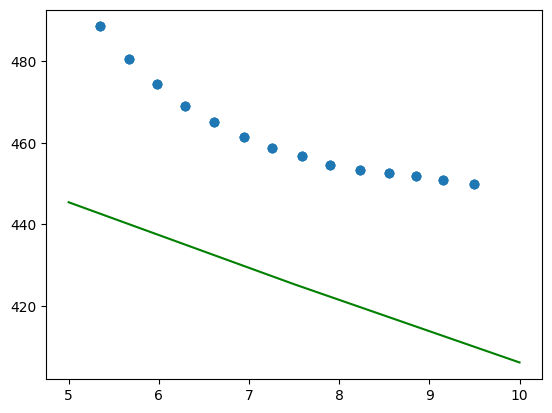

In [ ]:
"""
ruta_l1=f'datos_fps/{ruta_list[0]}'

t_1, y_1 = graficas(ruta_l1)

plt.scatter(t_1[1], y_1[1], label='Datos Grupo 1')
alpha_l1_A = 0.0185
A_0_l1_A = 488.5690

tiempo= np.linspace(5, 10, 3)
#plt.plot(tiempo, A_0_l1_A * np.exp(-alpha_l1_A*tiempo), color='red', label='Ajuste Grupo 1')

def ajuste(c,A_0, alp):
    return A_0 * np.exp(-alp*c)

plt.plot(tiempo, ajuste(tiempo, A_0_l1_A, alpha_l1_A), color='green', label='Ajuste Grupo 1 modificado')
print(ruta_l1)

Los parámetros optimizados son: [39.40787719  0.794962  ]
La covarianza es: [[0.10420772 0.00212215]
 [0.00212215 0.00011274]]
[488.56903177 480.70097269 474.47326381 469.01185286 465.08470135
 461.40347333 458.73582222 456.79960419 454.50474726 453.23542256
 452.50016585 451.73104919 450.91456823 449.94196266 488.56903177
 480.70097269 474.47326381 469.01185286 465.08470135 461.40347333
 458.73582222 456.79960419 454.50474726 453.23542256 452.50016585
 451.73104919 450.91456823 449.94196266 488.56903177 480.70097269
 474.47326381 469.01185286 465.08470135 461.40347333 458.73582222
 456.79960419 454.50474726 453.23542256 452.50016585 451.73104919
 450.91456823 449.94196266]


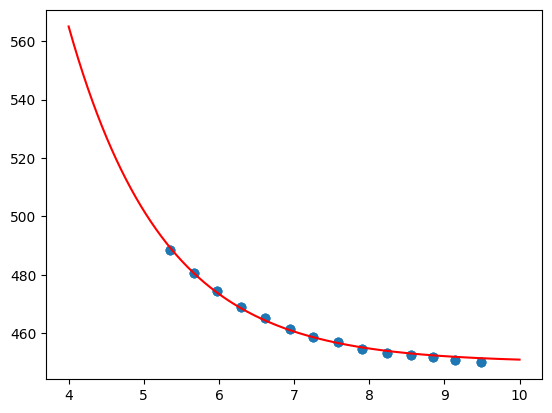

In [ ]:
"""
def ajuste(c,A_0, alp):
    return A_0 * np.exp(-alp*(c-t_1[1][0]))+y_1[1][-1]

opt, cov = curve_fit(ajuste, t_1[1], y_1[1], p0=[y_1[1][0], 0.1], bounds=([[-np.inf, 0],[np.inf, np.inf]]))

print(f'Los parámetros optimizados son: {opt}')
print(f'La covarianza es: {cov}')
print(y_1[1])

time= np.linspace(4, 10, 2000)
plt.plot(time, ajuste(time, opt[0], opt[1]), color='red')
plt.scatter(t_1[1], y_1[1], label='Datos Grupo 1')

In [ ]:
"""
plt.plot(time, funcion_exponencial(time, y_1[0][-1], 26.550/q, 0.9284))
plt.scatter(t_1[0], y_1[0], label='Datos Grupo 0')
print(y_1[0][-1])

TypeError: funcion_exponencial() missing 1 required positional argument: 'alpha'